In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = np.load('X_train.npy')  # Load your preprocessed training data
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')  # Load your validation data
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')  # Load your test data
y_test = np.load('y_test.npy')

In [4]:
print(f"Training Data: {X_train.shape}, {y_train.shape}")
print(f"Validation Data: {X_val.shape}, {y_val.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Training Data: (2622, 1000, 6), (2622,)
Validation Data: (1041, 1000, 6), (1041,)
Test Data: (837, 1000, 6), (837,)


In [5]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


# Define the number of classes
num_classes = len(np.unique(y_train))

# Pass the correct input shape for your data
model = make_model(input_shape=(X_train.shape[1], X_train.shape[2]))
keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [7]:
epochs = 100
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [8]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_val, y_val),
    verbose=1,
)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 0.4229 - sparse_categorical_accuracy: 0.8369 - val_loss: 0.4034 - val_sparse_categorical_accuracy: 0.8607 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.2895 - sparse_categorical_accuracy: 0.9112 - val_loss: 0.3130 - val_sparse_categorical_accuracy: 0.8886 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.2623 - sparse_categorical_accuracy: 0.9274 - val_loss: 0.2723 - val_sparse_categorical_accuracy: 0.9174 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.2327 - sparse_categorical_accuracy: 0.9351 - val_loss: 0.2260 - val_sparse_categorical_accuracy: 0.9376 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.2184 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.3088 - val_sparse_categorical_accuracy: 0.9116 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1

In [9]:
model = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9807
Test accuracy: 0.9844683408737183
Test loss: 0.03680165484547615


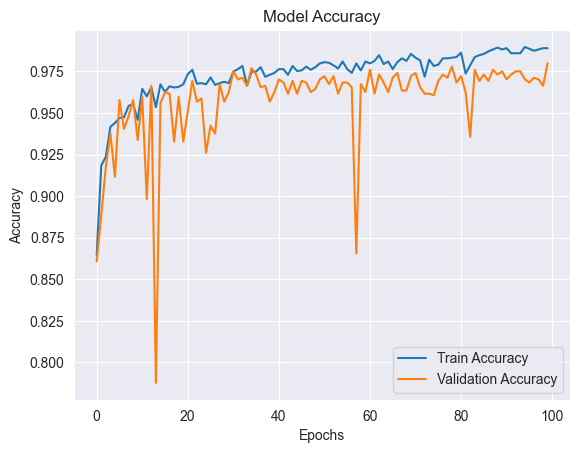

In [10]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric], label="Train Accuracy")
plt.plot(history.history["val_" + metric], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

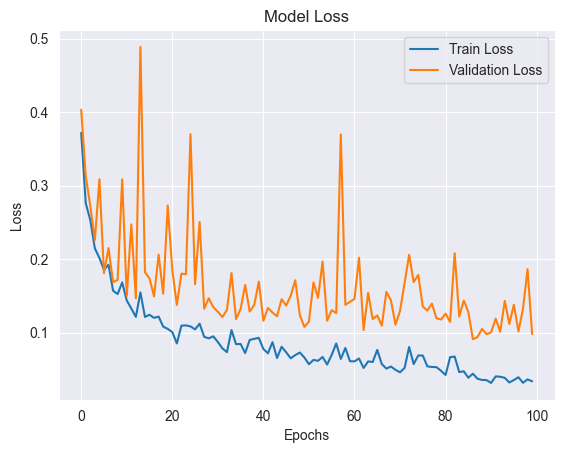

In [11]:
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [12]:
from sklearn.metrics import classification_report

# Load the best model
model = keras.models.load_model("best_model.keras")

# Predict the classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       539
           1       0.98      0.97      0.98       298

    accuracy                           0.98       837
   macro avg       0.98      0.98      0.98       837
weighted avg       0.98      0.98      0.98       837

